In [1]:
import struct
import os
import sys

In [292]:
f = open("../data/game/iso/FILES/SALON.VIP","rb")

data = f.read(0x20)

In [201]:
viphead, w ,h,nose= struct.unpack("<8p2h20p",data)

In [202]:
list(viphead), w ,h,list(nose)

([73, 80, 48, 49, 48, 2, 0], 228, 140, [])

In [293]:
f.tell()

32

In [204]:

img_size = w*h
print(w,h,img_size,hex(img_size))

228 140 31920 0x7cb0


In [205]:
def read_vip_frame_header(fd):
    buffer = fd.read(0x8)
    lenght,no_se1,no_se2,no_se3 = struct.unpack("<4h",buffer)
    return lenght,no_se1,no_se2,no_se3


def read_vip_frame_header_byte_arry(fd):
    buffer = fd.read(0x8)
    return struct.unpack("<8B",buffer)


In [206]:
def read_n_bytes(fd, lenght):
    buffer = fd.read(lenght)
    return struct.unpack(f"<{lenght}B",buffer)

In [207]:
def seek(fd,nbytes):
    fd.seek(nbytes,os.SEEK_CUR)

In [208]:
list_headers = []
if False:
    #f.seek(0x20,0)
    f.seek(0x0DF5B6A0,0)
    with open("testaudio.raw","wb") as fda:
        while True:
            buffer = f.read(0x8)
            if not buffer:
                break
            header = struct.unpack("<8B",buffer)
            size,kind,_,_ = struct.unpack("<4H",buffer)
            list_headers.append(header)
            #print(hex(size))
            if kind==0x0700:
                audio = f.read(size)
                fda.write(audio)
            else:
                seek(f,size)
            if len(list_headers)>10000:
                break


In [209]:
if False:
    for count,bh in  enumerate(list_headers):
        h=bh[0]
        endset = "💩💩💩💩💩💩💩💩💩💩💩"
        size=h[1]*0xff+h[0]
        print(f"{count:06}: [{size:>6}]",end=" ")
        for i,b in enumerate(h):
            print(f"{b:02x}" ,end=" ")
            if i==3:
                if b==4:
                    endset = "🗝️"
                elif b==7:
                    endset = "🎵"
                elif b==2 :
                    endset = "🎨"
                elif b==5:
                    endset = "🎬"

        print(f"{endset}")

In [212]:
list_headers = []

f.seek(0x20,0)
#f.seek(0x0DF5B6A0,0)
#f.seek(0x0135a684,0)

while True:
    
    buffer = f.read(0x8)
    if not buffer:
        break
    header = struct.unpack("<8B",buffer)
    size,kind,_,_ = struct.unpack("<4H",buffer)
    datos = f.read(size)
    list_headers.append((header,datos))
    #print(hex(size))
    if len(list_headers)>1500:
        break

In [213]:
if True:
    for count,bh in  enumerate(list_headers):
        h=bh[0]
        endset = "💩💩💩💩💩💩💩💩💩💩💩"
        size=h[1]*0xff+h[0]
        print(f"{count:06}: [{size:>6}]",end=" ")
        for i,b in enumerate(h):
            print(f"{b:02x}" ,end=" ")
            if i==3:
                if b==4:
                    endset = "🗝️"
                elif b==7:
                    endset = "🎵"
                elif b==2 :
                    endset = "🎨"
                elif b==5:
                    endset = "🎬"

        print(f"{endset}")

000000: [   578] 44 02 00 02 00 00 60 c0 🎨
000001: [ 32465] 50 7f 02 05 00 00 60 c0 🎬


In [214]:
count = 0
for i in buffer_pixels:
    if i%1 == 0:
        count += i
        
print(count)

605612


In [215]:
def read_paleta_from_chunk(chunk):
    pal = []
    pal.append((0,0,0))
    i=1
    while True:
        try:
            r,g,b = chunk[i:i+3] # leemos RGB
            i+=3
            pal.append( (r,g,b))
        except Exception as e:
            print(f"XXXX:{e}")
            break
    return pal

In [216]:
np.array([int(x) for x in buffer_pixels if x!=1],dtype="uint8").sum()

605502

In [217]:
f.close()

In [218]:
import numpy as np
from pprint import pprint

In [219]:
nframe=1
buffer_pixels = list_headers[nframe][1]
print(list_headers[nframe][0])
tmp_data = np.array([int(x) for x in buffer_pixels],dtype="uint8")
pprint(tmp_data[:100])

(80, 127, 2, 5, 0, 0, 96, 192)
array([  0,   0,   1,   0,   0,   0, 140,   0,  30,   0, 130, 136,   0,
        24,  82, 145, 183,  82,  75, 108, 108,  75, 136, 108, 172,  85,
       157, 178, 128, 128,  87,  96, 120,  96,  96,  70,  70,  64,  70,
         0, 130,  65,   0,   3,  64,  65,  65,  98,   0, 131,  64,   0,
         3,  65,  64,  65,  64,   0, 130, 118,   0,   8,  64,  65,  65,
        70,  65, 118, 118, 177, 177,   0, 132, 126,   0,   5,  49,  39,
        64, 153, 186, 122,   0, 133,  33,   0,  10, 189,  13, 153, 120,
        58,  70, 126,  79, 134, 155,  79,   0, 130], dtype=uint8)


In [220]:
if True:
    with open("supuesto_keyframe_SALON.frm","wb") as fp:
        fp.write(buffer_pixels)

In [221]:
len(tmp_data)

32592

In [222]:
nframe=0
buffer_pixels = list_headers[nframe][1]
print(list_headers[nframe][0])
tmp_data = np.array([int(x) for x in buffer_pixels],dtype="uint8")


(68, 2, 0, 2, 0, 0, 96, 192)


In [223]:
if True:
    with open("supuesta_paleta_SALON.pal","wb") as fp:
        fp.write(buffer_pixels)

In [224]:
paleta = read_paleta_from_chunk(tmp_data)


XXXX:not enough values to unpack (expected 3, got 0)


In [225]:
len(paleta)


194

In [226]:
import matplotlib.pyplot as plt

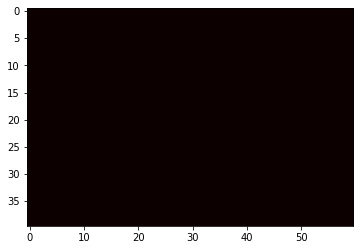

In [227]:
pal =  np.array( paleta ,dtype="uint8") 
indices = np.ones((40,60),dtype="uint8") * 133
plt.imshow(pal[indices] )

In [164]:
pal[33]

array([ 2, 36, 20], dtype=uint8)

#no va:
- FINALPAL

In [142]:
with open("../data/game/iso/FILES/TRAN_PAL.PPS","rb") as f:
    header = f.read(2)
    pal = []
    pal.append((0,0,0))
    while True:
        try:
            color = f.read(3) # leemos RGB
            if len(color)==0:
                break
            color_rgb = struct.unpack("<3B",color)
            pal.append(color_rgb)
        except Exception as e:
            print(len(color),e)
            break
        


In [228]:
nframe=1
buffer_pixels = list_headers[nframe][1]
print(list_headers[nframe][0])
tmp_data = np.array([int(x) for x in buffer_pixels],dtype="uint8")
pprint(tmp_data )

(80, 127, 2, 5, 0, 0, 96, 192)
array([  0,   0,   1, ...,  89,  89, 190], dtype=uint8)


In [229]:
len(pal)

194

In [300]:
new_buffer=[]
for c in tmp_data[671:-1]:
    if c>len(pal):
        c=1
    r,g,b = pal[c]
    new_buffer.append([r*4,g*4,b*4])

In [301]:
new_img = np.array(new_buffer,dtype="uint8")


In [302]:
new_img.shape,97*2


((31920, 3), 194)

In [303]:
new_img=new_img.reshape(( 140,-1, 3))

In [304]:
len(tmp_data),new_img.shape

(32592, (140, 228, 3))

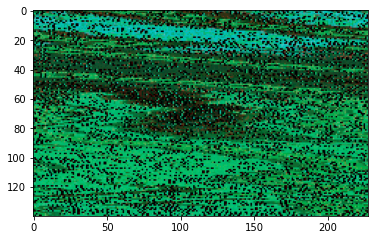

In [305]:
plt.imshow(new_img  )

In [306]:
plt.imsave("train.png",new_img)

In [ ]:
new_buffer[:19]

In [151]:
int(0b01111111)

127

In [153]:
0xff

255

In [ ]:
16000